In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [148]:
# Loading my preprocessed data
customer_df = pd.read_csv("processed_data/customer_data_ready.csv")
customer_df.head()

,Customer ID,Recency,Frequency,Monetary,Customer Age,Total_Returns,Churn
0,1,288,3,6290,67,0,0
1,2,72,6,16481,42,4,0
2,3,222,4,9423,31,0,0
3,4,441,5,7826,37,3,0
4,5,424,5,9769,24,3,0


In [159]:
# Selecting features for clustering
X = customer_df[['Recency', 'Frequency', 'Monetary', 'Total_Returns']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## To Actually Decide the Number of Clusters:
**Elbow Method** is used. 

**What does It Do:** Plots the Sum of Squared Errors (SSE) for different cluster counts and looks for a "knee" point where SSE starts decreasing slowly.
->The "elbow" (sharp bend) in the plot indicates the optimal cluster count.
**Example:** If the bend occurs at k=4, use n_clusters=4.
### The Elbow Method helps you decide the best number of clusters for K-means.
### The SSE (Inertia) measures how well the data points fit into clusters.
### The elbow point in the plot is where you should stop adding clusters.

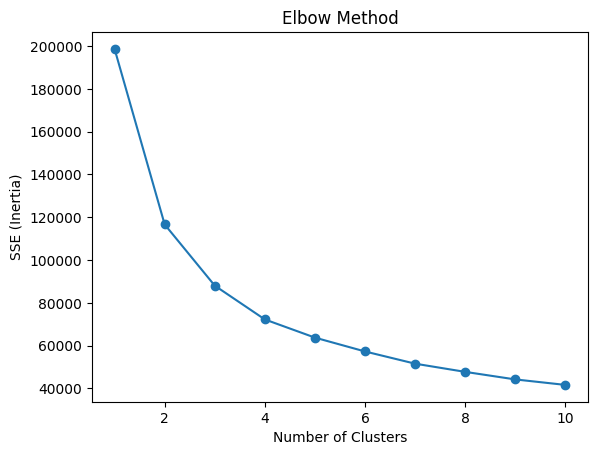

from the above figure we have found that the elbow appears around k=4 or k=5


In [160]:
   # ELbow Method with Silhouette Analysis
sse = []                       #This list will store the SSE (inertia) for each number of clusters (from 1 to 10).
for k in range(1, 11):         # Tests different numbers of clusters (k) to see which one works best.
    
    #Initialize K-means for Each Cluster Count
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled) #Trains the K-means model on the customer data using the features Recency, Frequency, and Monetary.
    
    # Append the SSE (Inertia) to the List
    sse.append(kmeans.inertia_)
    # SSE (Inertia): Measures how far the data points are from their cluster centers
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()
print("from the above figure we have found that the elbow appears around k=4 or k=5")

In [161]:
# Initialize K-means with optimal clusters
optimal_clusters = 4  # replacing with the number we found from elbow method
model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)

# Fit the model
model.fit(X_scaled)

# Get cluster labels and centroids/centers
centers = model.cluster_centers_
labels = model.labels_

# Add cluster labels to your dataframe
customer_df['Cluster'] = labels
# Analyze clusters
cluster_summary = customer_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Total_Returns': 'mean',  # Include returns for analysis
    'Churn': 'mean'
}).reset_index()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
    Cluster     Recency  Frequency      Monetary  Total_Returns     Churn
0        0  195.351956   3.464459   8855.595436       1.119023  0.196241
1        1  141.381095   8.393348  23894.364716       3.971493  0.201175
2        2  185.855539   5.771493  15852.363719       2.367248  0.201133
3        3  726.600410   2.832809   7546.086671       1.083937  0.203418


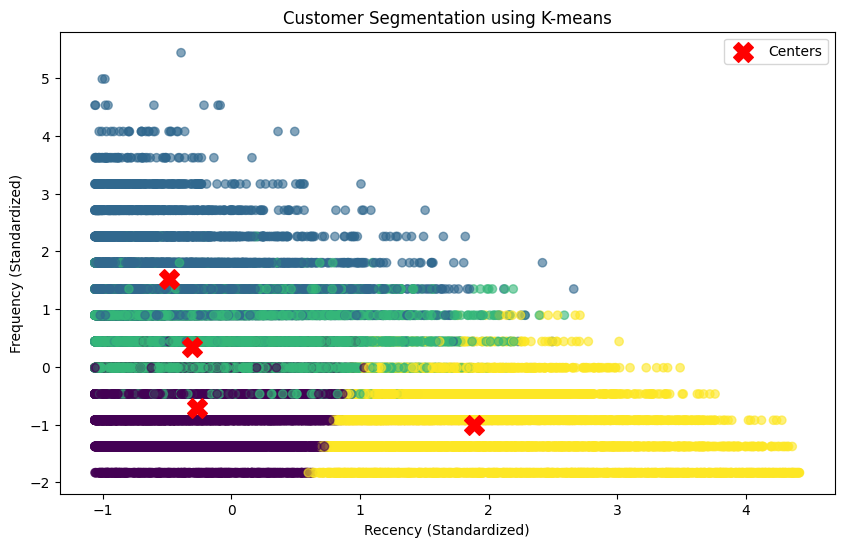

In [162]:
# Visualize clusters (2D example: Recency vs Frequency)
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=200, label='Centers')
plt.xlabel('Recency (Standardized)')
plt.ylabel('Frequency (Standardized)')
plt.title('Customer Segmentation using K-means')
plt.legend()
plt.show()


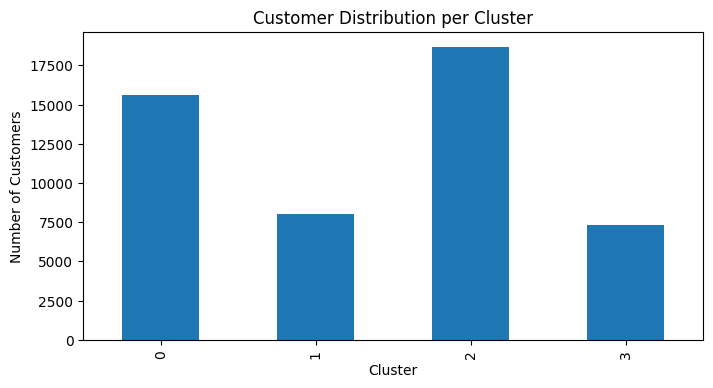

In [163]:
# showing cluster distribution
plt.figure(figsize=(8, 4))
customer_df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution per Cluster')
plt.show()

**cluster(0)**--> **Recency (Standardized):** Low (-1 to 0)--> **Frequency (Standardized):** High (2 to 3)--> **Interpretation:** Loyal Customers	       	               	           
**cluster(1)**--> **Recency (Standardized):** High (3 to 4)--> **Frequency (Standardized):** Low (-1 to 0)--> **Interpretation:** At-Risk Customers

**cluster(2)**--> **Recency (Standardized):** Moderate (1 to 2)--> **Frequency (Standardized):** Moderate (1 to 2)--> **Interpretation:**	       Average Customers


## Recency vs. Frequency is a classic combination because:
-> High Frequency + Low Recency: Loyal customers (buy often and recently).
-> Low Frequency + High Recency: At-risk customers (haven’t bought in a while).

### A Monetary vs. Frequency plot could also be useful to identify high-value customers.
### Recency vs. Monetary: Identify big spenders who haven’t purchased recently.
### Frequency vs. Total_Returns: Find customers who buy often but return frequently.

## for business context:
**Example:** If your goal is to reduce churn, prioritize Recency vs. Frequency.

**Example:** If your goal is to boost revenue, prioritize Monetary vs. Frequency.

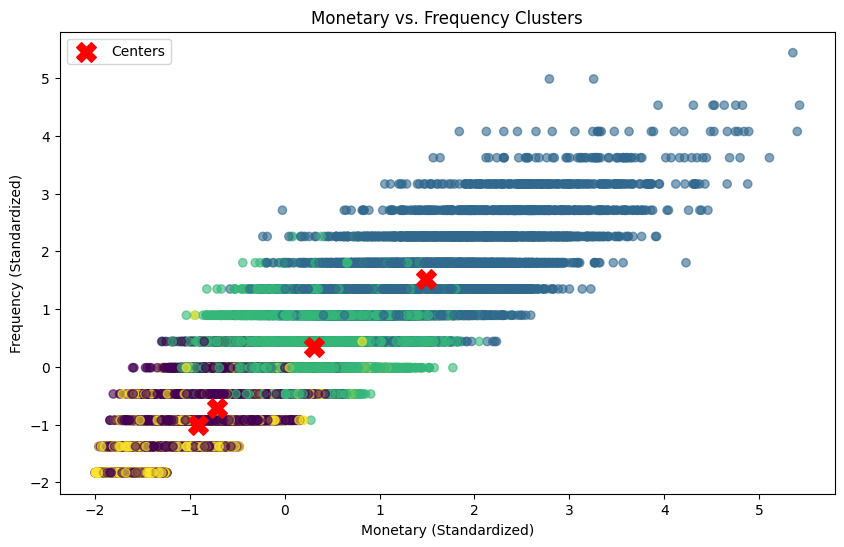

In [132]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,2], X_scaled[:,1], c=labels, cmap='viridis', alpha=0.6)  # Monetary (index 2) vs. Frequency (index 1)
plt.scatter(centers[:,2], centers[:,1], c='red', marker='X', s=200, label='Centers')
plt.xlabel('Monetary (Standardized)')
plt.ylabel('Frequency (Standardized)')
plt.title('Monetary vs. Frequency Clusters')
plt.legend()
plt.show()

In [133]:
import joblib 
# Create directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

In [134]:
# Save the trained model and scaler using joblib
joblib.dump(model, "models/kmeans_model.joblib")
joblib.dump(scaler, "models/scaler.joblib")

['models/scaler.joblib']

In [135]:
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [124]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Churn Prediction Model

In [104]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE  # For handling class imbalance
# import numpy as np

In [105]:
# customer_df.head(10)

In [106]:
# customer_df['Churn_New'] = (customer_df['Recency'] > 180).astype(int)
# # Define the target variable (Churn: 1 = Churned, 0 = Active)
# # Assuming churn means no purchase in last 6 months 
# # customer_df['Churned'] = np.where(customer_df['Recency'] > 180, 1, 0)
# # Create Average Purchase Value: Monetary / Frequency (handling division by zero)
# customer_df['AvgPurchaseValue'] = customer_df.apply(
#     lambda row: row['Monetary'] / row['Frequency'] if row['Frequency'] > 0 else 0,
#     axis=1
# )

# # Create Customer Lifetime Value (CLV): Estimated as AvgPurchaseValue * 12
# customer_df['CLV'] = customer_df['AvgPurchaseValue'] * 12
# customer_df.head(5)

In [107]:
# X = customer_df[['Recency', 'Frequency', 'Monetary', 'Total_Returns', 'CLV', 'AvgPurchaseValue']]
# y = customer_df['Churn']

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data into train & test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # # Handle class imbalance using SMOTE
# # smote = SMOTE(random_state=42)
# # X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # Train a RandomForest Classifier
# model = RandomForestClassifier(random_state=42, class_weight='balanced')
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [108]:
# # Plot confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# plt.figure(figsize=(5, 4))
# plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.colorbar()
# plt.show()

In [109]:
# # Plot feature importance
# feature_importance = pd.Series(model.feature_importances_, index=X.columns)
# feature_importance.sort_values().plot(kind='barh', color='teal')
# plt.title('Feature Importance for Churn Prediction')
# plt.show()


In [110]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import matplotlib.pyplot as plt

# # Create Average Purchase Value: Monetary / Frequency (handle division by zero)
# customer_df['AvgPurchaseValue'] = customer_df.apply(
#     lambda row: row['Monetary'] / row['Frequency'] if row['Frequency'] > 0 else 0,
#     axis=1
# )

# # Create Customer Lifetime Value (CLV): Estimated as AvgPurchaseValue * 12
# customer_df['CLV'] = customer_df['AvgPurchaseValue'] * 12
# print(customer_df.head())

In [111]:
# # Define features and target
# X = customer_df[['Recency', 'Frequency', 'Monetary', 'Total_Returns', 'AvgPurchaseValue', 'CLV']]  # Exclude Recency
# #print(customer_df['Churn_New'].value_counts())
# y = customer_df['Churn']

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data into train & test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Train Logistic Regression
# log_reg = LogisticRegression(random_state=42, class_weight='balanced')
# log_reg.fit(X_train, y_train)

# # Make predictions
# y_pred = log_reg.predict(X_test)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [112]:
# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# plt.figure(figsize=(5, 4))
# plt.imshow(cm, cmap='Blues', interpolation='nearest')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.colorbar()
# plt.show()

## Tried to add churn prediction model as well but churn seems to have unusal pattern.
## also accuracy of the model was also low and i guess i need to learn extra on model selection as well as balancing techniques